In [4]:
!pip install pyspark

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col

In [64]:
# Создание SparkSession
spark = SparkSession.builder \
    .appName("Average Close Price Calculation") \
    .getOrCreate()

spark.conf.set("spark.sql.shuffle.partitions", "50")

In [90]:

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Average Close Price Calculation") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9870") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

In [91]:
file_path = "https://raw.githubusercontent.com/cucann/5_semester/refs/heads/main/PLZL.csv"

In [92]:
pandas_df = pd.read_csv(file_path)

In [94]:
df = spark.createDataFrame(pandas_df)

In [95]:
df.show()

+----------+-------+-------+-------+-------+-------+------+
|      Дата|   Цена|  Откр.|  Макс.|   Мин.|  Объём|Изм. %|
+----------+-------+-------+-------+-------+-------+------+
|01.12.2019|7.103,5|6.882,0|7.265,0|6.720,0|  1,80M| 3,08%|
|01.11.2019|6.891,0|7.470,0|7.621,0|6.666,0|  2,48M|-7,74%|
|01.10.2019|7.469,0|7.502,0|7.739,0|7.026,0|  1,86M|-1,01%|
|01.09.2019|7.545,0|7.670,0|7.833,0|6.527,0|  2,16M|-1,57%|
|01.08.2019|7.665,0|6.433,0|7.665,0|6.374,5|  3,36M|18,65%|
|01.07.2019|6.460,0|5.775,0|6.550,0|5.650,0|  2,16M|10,84%|
|01.06.2019|5.828,0|5.179,5|5.989,5|5.175,0|  2,37M|12,72%|
|01.05.2019|5.170,5|5.035,0|5.170,5|4.760,0|  1,40M| 2,64%|
|01.04.2019|5.037,5|5.417,0|5.485,0|4.835,0|  3,17M|-7,35%|
|01.03.2019|5.437,0|5.460,0|5.589,0|5.020,0|  1,43M|-0,60%|
|01.02.2019|5.470,0|5.529,5|5.555,0|5.148,0|  1,31M|-0,44%|
|01.01.2019|5.494,0|5.400,0|5.678,0|5.060,0|830,52K| 1,76%|
+----------+-------+-------+-------+-------+-------+------+



In [70]:
pandas_df = df.toPandas()
pandas_df.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,01.12.2019,"7.103,5","6.882,0","7.265,0","6.720,0","1,80M","3,08%"
1,01.11.2019,"6.891,0","7.470,0","7.621,0","6.666,0","2,48M","-7,74%"
2,01.10.2019,"7.469,0","7.502,0","7.739,0","7.026,0","1,86M","-1,01%"
3,01.09.2019,"7.545,0","7.670,0","7.833,0","6.527,0","2,16M","-1,57%"
4,01.08.2019,"7.665,0","6.433,0","7.665,0","6.374,5","3,36M","18,65%"


In [82]:
from pyspark.sql.functions import col, avg, regexp_replace
df = df.withColumn("Цена", regexp_replace("Цена", "[^0-9.]", "").cast("double")) \
       .withColumn("Объём", regexp_replace("Объём", "[^0-9.]", "").cast("double")) \
       .na.drop(subset=["Цена", "Объём"])

In [84]:
average_close = df.agg(avg("Цена").alias("Average_Close")).collect()[0]["Average_Close"]
print(f"Средняя цена закрытия: {average_close}")

Средняя цена закрытия: 6.297541666666667


In [85]:
correlation = df.stat.corr("Цена", "Объём")
print(f"Корреляция между ценой и объемом торгов: {correlation}")

Корреляция между ценой и объемом торгов: -0.2525548703646292


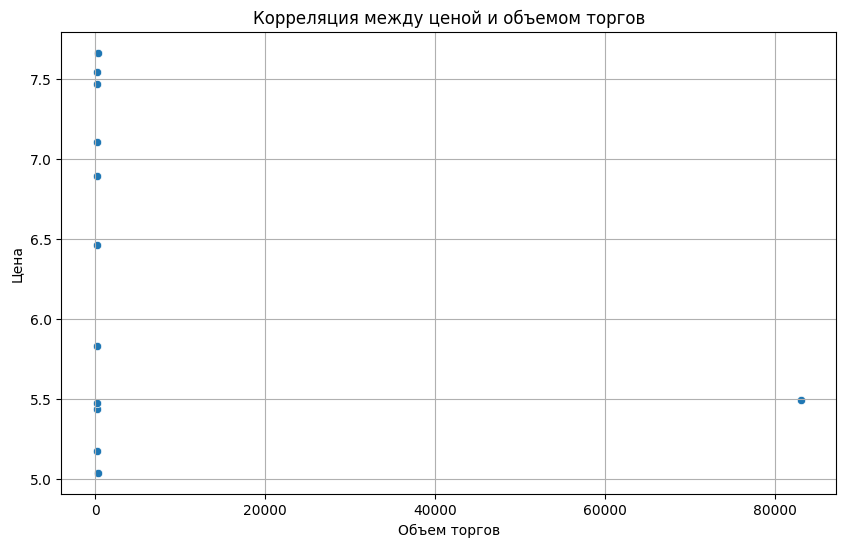

In [88]:
import seaborn as sns
pandas_df = df.toPandas()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df, x="Объём", y="Цена")
plt.title("Корреляция между ценой и объемом торгов")
plt.xlabel("Объем торгов")
plt.ylabel("Цена")
plt.grid()
plt.show()

In [102]:
avgicor_spark = spark.createDataFrame(pandas_df)

In [ ]:
file_path_hdfs = "hdfs://localhost:9870/userind/hadoop/polus_data/newdata.csv"

newdata_spark.write.csv(file_path_hdfs, header=True, mode='overwrite')

In [ ]:
#Ошибка org.apache.hadoop.security.AccessControlException:
# Permission denied указывает на то, что текущий пользователь (devops) не имеет прав на запись в указанный каталог HDFS (/user2/hadoop/economic_data).

Изменение прав доступа к каталогу:

Используйте команду hdfs dfs -chmod для изменения прав доступа и разрешения записи для нужного пользователя:
hdfs dfs -chmod 777 /user2/hadoop/economic_data